Files already downloaded and verified


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:

adam = np.load("cifar/ADAM-50.npy")
nag = np.load("cifar/NAG-50.npy")
rmsprop = np.load("cifar/RMSprop-50.npy")
sgd = np.load("cifar/SGD-50.npy")
normal_opts = [adam, nag, rmsprop, sgd]
adam.shape

(50, 100)

In [ ]:
all_losses = np.load("cifar/all_losses.npy")
# we're only interested in the last epoch (the most trained one )
all_losses = all_losses[all_losses.shape[0]-1, :, :]
all_losses.shape # (N_tests, N_updates)

(10, 51)

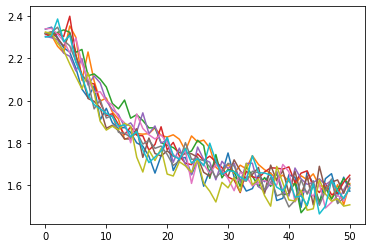

In [ ]:
plt.plot(all_losses.transpose())
plt.show() # 10 lines of 50 updates

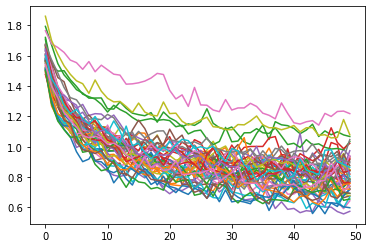

In [ ]:
# adam and the others 
trimmed_opts = [opt[:, :50] for opt in normal_opts]
plt.plot(trimmed_opts[0].transpose())
plt.show()

In [ ]:
def to_long_form(data_arr):
    records = []
    for i in range(fit_data.shape[0]):
        for j in range(fit_data.shape[1]):
            for k in range(fit_data.shape[2]):
                records.append((i, j, condition[k], fit_data[i, j, k]))
    df = pd.DataFrame.from_records(records,columns=['test', 'Steps', 'Optimizer', 'Loss'] )
    return df

In [ ]:
fit_data = trimmed_opts + [all_losses]
opt_names = ['Adam', "NAG", "RMSprop", "SGD", "LSTM"]
records = []
for opt, name in zip(fit_data, opt_names):
    print(name)
    
    for test in range(opt.shape[0]):
        for epoch in range(opt.shape[1]):
            records.append((name, test, epoch, opt[test, epoch]))

df = pd.DataFrame.from_records(records, columns=["Optimizer", "test", "Epoch", "Loss"])

Adam
NAG
RMSprop
SGD
LSTM


In [ ]:
df

,Optimizer,test,Epoch,Loss
0,Adam,0,0,1.581114
1,Adam,0,1,1.359721
2,Adam,0,2,1.325255
3,Adam,0,3,1.210934
4,Adam,0,4,1.166374
...,...,...,...,...
10505,LSTM,9,46,1.501597
10506,LSTM,9,47,1.623930
10507,LSTM,9,48,1.574975
10508,LSTM,9,49,1.538356


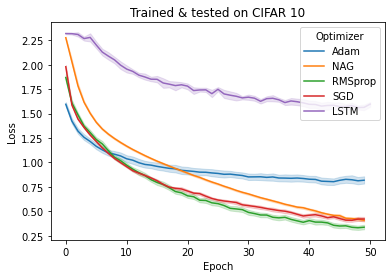

In [ ]:
axis = sns.lineplot(data=df, x='Epoch', y='Loss', hue='Optimizer', ci=95)
plt.title("Trained & tested on CIFAR 10")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b20e1b0b-d80b-4297-abae-d3a4799140e7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>